# Load Libraries

In [43]:
import datasets
import huggingface_hub
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

In [44]:
pd.set_option("display.max_columns", None)

## Load and Preprocess V1

In [45]:
# Load the v1 JSONL file
ds = datasets.load_dataset("open-llm-leaderboard-old/contents", split="train")
data_v1 = ds.to_pandas()
data_v1.shape

(7260, 26)

In [46]:
# Drop contaminated models
data_v1 = data_v1[~data_v1.eval_name.str.contains("contaminated")]

In [47]:
data_v1.shape

(7258, 26)

In [48]:
data_v1.head()

eval_name Precision  \
0                    0-hero_Matter-0.1-7B_bfloat16  bfloat16   
1        0-hero_Matter-0.1-7B-DPO-preview_bfloat16  bfloat16   
2              0-hero_Matter-0.1-7B-boost_bfloat16  bfloat16   
3          0-hero_Matter-0.1-7B-boost-DPO_bfloat16  bfloat16   
4  0-hero_Matter-0.1-7B-boost-DPO-preview_bfloat16  bfloat16   

                                  Type  T Weight type        Architecture  \
0  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
1  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
2  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
3  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
4  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   

                                               Model  \
0  <a target="_blank" href="https://huggingface.c...   
1  <a target="_blank" href="https://huggingface.c...   
2  <a target="_blank" href="https://huggingface.c...   
3  <a target="_blank" href="https://huggingface.c...   
4  <a target="_blank" href="https://huggingface.c...   

                                 fullname  \
0                    0-hero/Matter-0.1-7B   
1        0-hero/Matter-0.1-7B-DPO-preview   
2              0-hero/Matter-0.1-7B-boost   
3          0-hero/Matter-0.1-7B-boost-DPO   
4  0-hero/Matter-0.1-7B-boost-DPO-preview   

                                  Model sha  Average ⬆️ Hub License  Hub ❤️  \
0  035c8193ce71be90be7d90098669afb9164ec6cb   63.391248  apache-2.0       0   
1  78040e4754051df49dd907cf1fd46a6b8a6cc30f   64.870290  apache-2.0       0   
2  ba56089eed1211f02e8d0ff47901e77b0cd48f83   63.223517  apache-2.0       0   
3  5bee9978fcf2188f1070b67f6d94be344fdd99c0   65.985858                   0   
4  d390fb35a781129efd26d53f7ecdb513c0c3da27   65.767435  apache-2.0       2   

   #Params (B)  Available on the hub  Merged   MoE  Flagged  \
0            7                  True    True  True     True   
1            7                  True    True  True     True   
2            7                  True    True  True     True   
3            7                 False    True  True     True   
4            7                  True    True  True     True   

                   date  Chat Template        ARC  HellaSwag       MMLU  \
0  2024-03-21T06:05:50Z          False  61.774744  82.135033  62.423731   
1  2024-03-23T04:13:58Z          False  62.713311  82.991436  62.700299   
2  2024-03-21T06:05:38Z          False  62.627986  81.507668  61.967618   
3  2024-03-22T15:02:21Z          False  65.017065  83.081060  61.873805   
4  2024-03-22T07:40:42Z          False  64.590444  82.871938  62.017625   

   TruthfulQA  Winogrande      GSM8K  Maintainers Choice  
0   42.439513   77.821626  53.752843               False  
1   45.790101   78.847672  56.178923               False  
2   54.702404   75.927388  42.608036               False  
3   60.293632   75.611681  50.037908               False  
4   58.859162   75.848461  50.416983               False

## Load and Preprocess V2

In [49]:
# Load the v2 JSONL file
ds = datasets.load_dataset("open-llm-leaderboard/contents", split="train")
data_v2 = ds.to_pandas()
data_v2.shape

Using the latest cached version of the dataset since open-llm-leaderboard/contents couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/hynky/.cache/huggingface/datasets/open-llm-leaderboard___contents/default/0.0.0/047b1ed979280dc72702d1635a8938216ccb968c (last modified on Wed Jun 26 17:19:09 2024).


(206, 32)

In [50]:
data_v2.shape

(206, 32)

In [51]:
data_v2.head()

eval_name Precision  \
0                   upstage_SOLAR-10.7B-v1.0_float16   float16   
1          upstage_SOLAR-10.7B-Instruct-v1.0_float16   float16   
2  togethercomputer_RedPajama-INCITE-Instruct-3B-...   float16   
3  togethercomputer_RedPajama-INCITE-Chat-3B-v1_f...   float16   
4  togethercomputer_RedPajama-INCITE-Base-3B-v1_f...   float16   

                                       Type  T Weight type  \
0                              🟢 pretrained  🟢    Original   
1       💬 chat models (RLHF, DPO, IFT, ...)  💬    Original   
2  🔶 fine-tuned on domain-specific datasets  🔶    Original   
3  🔶 fine-tuned on domain-specific datasets  🔶    Original   
4                              🟢 pretrained  🟢    Original   

         Architecture                                              Model  \
0    LlamaForCausalLM  <a target="_blank" href="https://huggingface.c...   
1    LlamaForCausalLM  <a target="_blank" href="https://huggingface.c...   
2  GPTNeoXForCausalLM  <a target="_blank" href="https://huggingface.c...   
3  GPTNeoXForCausalLM  <a target="_blank" href="https://huggingface.c...   
4  GPTNeoXForCausalLM  <a target="_blank" href="https://huggingface.c...   

                                           fullname  \
0                          upstage/SOLAR-10.7B-v1.0   
1                 upstage/SOLAR-10.7B-Instruct-v1.0   
2  togethercomputer/RedPajama-INCITE-Instruct-3B-v1   
3      togethercomputer/RedPajama-INCITE-Chat-3B-v1   
4      togethercomputer/RedPajama-INCITE-Base-3B-v1   

                                  Model sha  Average ⬆️   Hub License  Hub ❤️  \
0  a45090b8e56bdc2b8e32e46b3cd782fc0bea1fa5   17.072003    apache-2.0     248   
1  c08c25ed66414a878fe0401a3596d536c083606c   19.961989  cc-by-nc-4.0     592   
2  0c66778ee09a036886741707733620b91057909a    5.877290    apache-2.0      91   
3  f0e0995eba801096ed04cb87931d96a8316871af    4.950649    apache-2.0     147   
4  094fbdd0c911feb485ce55de1952ab2e75277e1e    5.645099    apache-2.0      90   

   #Params (B)  Available on the hub  Merged   MoE  Flagged  \
0           10                  True    True  True    False   
1           10                  True    True  True    False   
2            3                  True    True  True    False   
3            3                  True    True  True    False   
4            3                  True    True  True    False   

                   date  Chat Template  IFEval Raw     IFEval   BBH Raw  \
0  2024-06-12T12:27:42Z          False    0.242126  24.212645  0.509387   
1  2024-06-12T12:06:58Z           True    0.473661  47.366100  0.516249   
2  2024-06-12T12:07:46Z          False    0.212426  21.242636  0.314602   
3  2024-06-13T17:58:59Z          False    0.165215  16.521496  0.321669   
4  2024-06-12T12:28:23Z          False    0.229363  22.936254  0.306040   

         BBH  MATH Lvl 5 Raw  MATH Lvl 5  GPQA Raw      GPQA  MUSR Raw  \
0  29.789358        0.021148    2.114804  0.281040  4.138702  0.437156   
1  31.872402        0.000000    0.000000  0.308725  7.829978  0.389937   
2   4.510786        0.006042    0.604230  0.247483  0.000000  0.388604   
3   5.164728        0.003021    0.302115  0.244128  0.000000  0.368448   
4   3.518608        0.009063    0.906344  0.243289  0.000000  0.373875   

        MUSR  MMLU-PRO Raw   MMLU-PRO  Maintainer's Highlight  
0  13.677865      0.340010  26.667775                    True  
1   6.942188      0.313830  23.758865                    True  
2   6.408854      0.110954   1.217125                    True  
3   5.089323      0.112699   1.411052                    True  
4   4.001042      0.111120   1.235594                    True

In [52]:
# Displaying the column names from both datasets to identify the correct ones to use
columns_v1 = data_v1.columns
print(f"V1 columns: {columns_v1}")
print("--" * 5)
columns_v2 = data_v2.columns
print(f"V2 columns: {columns_v2}")

V1 columns: Index(['eval_name', 'Precision', 'Type', 'T', 'Weight type', 'Architecture',
       'Model', 'fullname', 'Model sha', 'Average ⬆️', 'Hub License', 'Hub ❤️',
       '#Params (B)', 'Available on the hub', 'Merged', 'MoE', 'Flagged',
       'date', 'Chat Template', 'ARC', 'HellaSwag', 'MMLU', 'TruthfulQA',
       'Winogrande', 'GSM8K', 'Maintainers Choice'],
      dtype='object')
----------
V2 columns: Index(['eval_name', 'Precision', 'Type', 'T', 'Weight type', 'Architecture',
       'Model', 'fullname', 'Model sha', 'Average ⬆️', 'Hub License', 'Hub ❤️',
       '#Params (B)', 'Available on the hub', 'Merged', 'MoE', 'Flagged',
       'date', 'Chat Template', 'IFEval Raw', 'IFEval', 'BBH Raw', 'BBH',
       'MATH Lvl 5 Raw', 'MATH Lvl 5', 'GPQA Raw', 'GPQA', 'MUSR Raw', 'MUSR',
       'MMLU-PRO Raw', 'MMLU-PRO', 'Maintainer's Highlight'],
      dtype='object')


## Analysing which models are in the v2 but not the v1

In [53]:
all_v2_models = sorted(list(data_v2["eval_name"]))
all_v1_models = sorted(list(data_v1["eval_name"]))
# all_v1_models[:10]
# all_v2_models[:10]

shortlist = [model for model in all_v2_models if model not in all_v1_models]
print("Missing", len(shortlist), "models")
print("Can only analyse", len(all_v2_models) - len(shortlist))

Missing 89 models
Can only analyse 117


In [54]:
# Same analysis, but we ignore the precision
all_v2_models = sorted(list(data_v2["fullname"]))
all_v1_models = sorted(list(data_v1["fullname"]))

shortlist = [model for model in all_v2_models if model not in all_v1_models]
print("Missing", len(shortlist), "models: ")
print(shortlist)
print("Can only analyse", len(all_v2_models) - len(shortlist))

Missing 37 models: 
['01-ai/Yi-6B-Chat', 'CohereForAI/aya-23-35B', 'EleutherAI/pythia-2.8b', 'EleutherAI/pythia-6.9b', 'LLM360/K2-Chat', 'NousResearch/Yarn-Llama-2-7b-128k', 'NousResearch/Yarn-Llama-2-7b-64k', 'NousResearch/Yarn-Solar-10b-32k', 'NousResearch/Yarn-Solar-10b-64k', 'Qwen/Qwen2-0.5B-Instruct', 'Qwen/Qwen2-1.5B-Instruct', 'Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct', 'TencentARC/MetaMath-Mistral-Pro', 'TinyLlama/TinyLlama_v1.1', 'WizardLMTeam/WizardLM-13B-V1.0', 'WizardLMTeam/WizardLM-13B-V1.2', 'WizardLMTeam/WizardLM-70B-V1.0', 'allenai/OLMo-7B-Instruct-hf', 'databricks/dolly-v1-6b', 'deepseek-ai/deepseek-llm-7b-base', 'deepseek-ai/deepseek-moe-16b-chat', 'distilbert/distilgpt2', 'google/gemma-1.1-2b-it', 'ibm-granite/granite-7b-base', 'internlm/internlm2-1_8b', 'internlm/internlm2-chat-1_8b', 'microsoft/Phi-3-small-128k-instruct', 'microsoft/phi-1', 'mistral-community/mixtral-8x22B-v0.3', 'mistralai/Mistral-7B-Instruct-v0.3', 'mlabonne/NeuralDaredevil-8B-abliterate

## Adding the creation dates of models 

In [55]:
for i, row in data_v1.iterrows():
    try:
        data_v1.at[i, "date"] = huggingface_hub.model_info(row["fullname"]).created_at
    except Exception:
        continue

KeyboardInterrupt: 

In [ ]:
data_v1.head()

eval_name Precision  \
0                    0-hero_Matter-0.1-7B_bfloat16  bfloat16   
1        0-hero_Matter-0.1-7B-DPO-preview_bfloat16  bfloat16   
2              0-hero_Matter-0.1-7B-boost_bfloat16  bfloat16   
3          0-hero_Matter-0.1-7B-boost-DPO_bfloat16  bfloat16   
4  0-hero_Matter-0.1-7B-boost-DPO-preview_bfloat16  bfloat16   

                                  Type  T Weight type        Architecture  \
0  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
1  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
2  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
3  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
4  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   

                                               Model  \
0  <a target="_blank" href="https://huggingface.c...   
1  <a target="_blank" href="https://huggingface.c...   
2  <a target="_blank" href="https://huggingface.c...   
3  <a target="_blank" href="https://huggingface.c...   
4  <a target="_blank" href="https://huggingface.c...   

                                 fullname  \
0                    0-hero/Matter-0.1-7B   
1        0-hero/Matter-0.1-7B-DPO-preview   
2              0-hero/Matter-0.1-7B-boost   
3          0-hero/Matter-0.1-7B-boost-DPO   
4  0-hero/Matter-0.1-7B-boost-DPO-preview   

                                  Model sha  Average ⬆️ Hub License  Hub ❤️  \
0  035c8193ce71be90be7d90098669afb9164ec6cb   63.391248  apache-2.0       0   
1  78040e4754051df49dd907cf1fd46a6b8a6cc30f   64.870290  apache-2.0       0   
2  ba56089eed1211f02e8d0ff47901e77b0cd48f83   63.223517  apache-2.0       0   
3  5bee9978fcf2188f1070b67f6d94be344fdd99c0   65.985858                   0   
4  d390fb35a781129efd26d53f7ecdb513c0c3da27   65.767435  apache-2.0       2   

   #Params (B)  Available on the hub  Merged   MoE  Flagged  \
0            7                  True    True  True     True   
1            7                  True    True  True     True   
2            7                  True    True  True     True   
3            7                 False    True  True     True   
4            7                  True    True  True     True   

                        date  Chat Template        ARC  HellaSwag       MMLU  \
0  2024-03-20 05:57:38+00:00          False  61.774744  82.135033  62.423731   
1  2024-03-19 11:27:26+00:00          False  62.713311  82.991436  62.700299   
2  2024-03-19 11:26:56+00:00          False  62.627986  81.507668  61.967618   
3       2024-03-22T15:02:21Z          False  65.017065  83.081060  61.873805   
4  2024-03-21 13:04:58+00:00          False  64.590444  82.871938  62.017625   

   TruthfulQA  Winogrande      GSM8K  Maintainers Choice  
0   42.439513   77.821626  53.752843               False  
1   45.790101   78.847672  56.178923               False  
2   54.702404   75.927388  42.608036               False  
3   60.293632   75.611681  50.037908               False  
4   58.859162   75.848461  50.416983               False

In [ ]:
for i, row in data_v2.iterrows():
    data_v2.at[i, "date"] = huggingface_hub.model_info(row["fullname"]).created_at

GatedRepoError: 403 Client Error. (Request ID: Root=1-667d5442-15ac7a31619de50959fbd646;1b7cdc8b-f9c7-4241-a915-a754b8658606)

Cannot access gated repo for url https://huggingface.co/api/models/CohereForAI/aya-23-8B.
Access to model CohereForAI/aya-23-8B is restricted and you are not in the authorized list. Visit https://huggingface.co/CohereForAI/aya-23-8B to ask for access.

## Define Tasks

In [56]:
tasks_v1 = ["HellaSwag", "MMLU", "TruthfulQA", "Winogrande", "GSM8K"]
tasks_v2 = ["IFEval", "BBH", "MATH Lvl 5", "GPQA", "MUSR", "MMLU-PRO"]
tasks_v2_raw = [f"{task} Raw" for task in tasks_v2]

# Detect Challenging Tasks

In [57]:
# Calculate the mean score for each task
mean_scores = data_v2[tasks_v2].mean().sort_values()
# we sort the raw scores on the normalised ones
mean_scores_raw = (
    data_v2[tasks_v2_raw].mean().reindex(index=[f"{s} Raw" for s in mean_scores.index])
)
# mean_scores_raw = data_v2[tasks_v2_raw].mean().sort_values()

# Create a DataFrame for mean scores
mean_scores_df = pd.DataFrame({"Normalized": mean_scores, "Raw": mean_scores_raw})

In [58]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

RED = "#FF323D"
ORANGE = "#FF9D00"
BLACK = "#32343D"
YELLOW = "#FFD21E"

fig = go.Figure(
    data=[
        go.Bar(
            x=mean_scores.index,
            y=mean_scores,
            name="Normalized Mean Scores",
            text=mean_scores,
            marker_color=RED
        ),
        go.Bar(
            x=[i.replace(" Raw", "") for i in mean_scores_raw.index],
            y=[m * 100 for m in mean_scores_raw],
            name="Raw Mean Scores",
            text=[m * 100 for m in mean_scores_raw],
            marker_color=ORANGE
        ),
    ],
    layout_yaxis_range=[0, 60],
)
fig = fig.update_layout(barmode="group")
fig.update_traces(texttemplate="%{text:.3s}", textposition="outside")
fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")

fig.update_layout(
    title="Normalized Vs Raw Scores Comparison",
    yaxis=dict(
        title="Score",
    ),
    barmode="group",
    bargap=0.15,  # gap between bars of adjacent location coordinates.
    bargroupgap=0.05,  # gap between bars of the same location coordinate.
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
    ),
)
with open("normalized_vs_raw.html", "w") as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs=False))
fig  # .to_html(full_html=False)

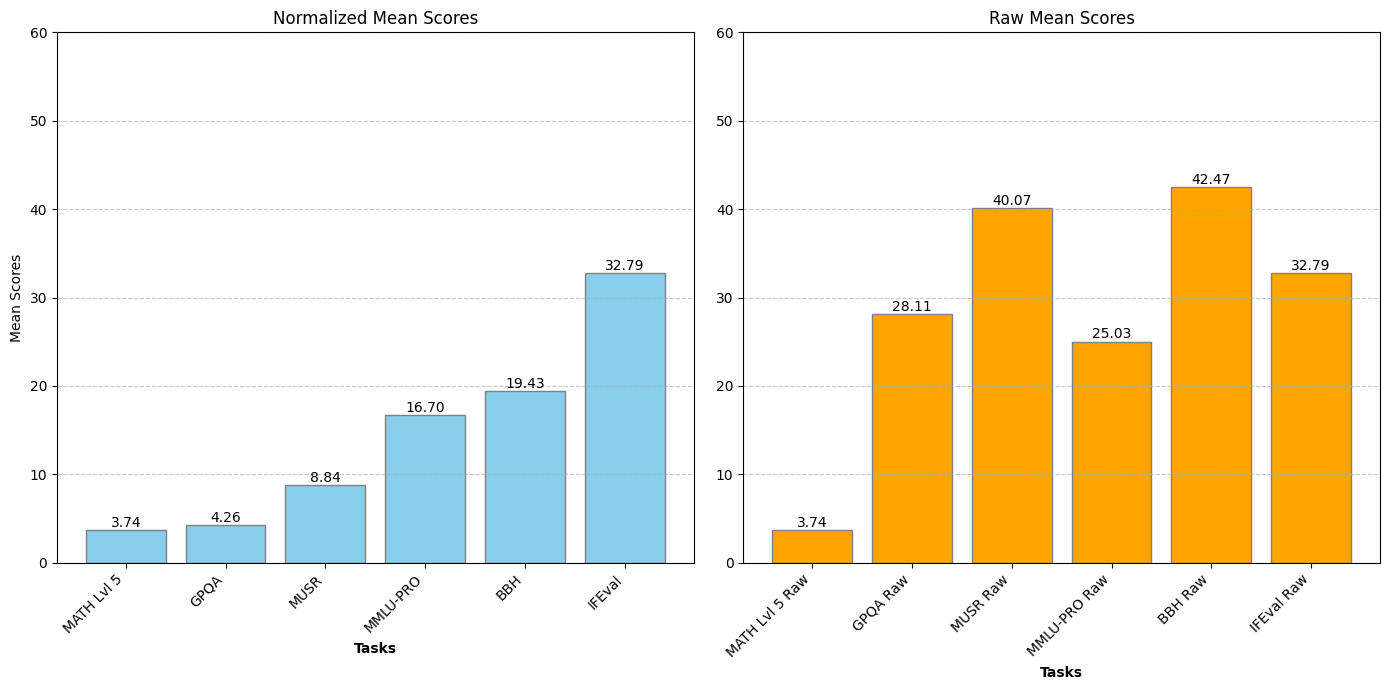

In [59]:
# Define the plot size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharey=False)

# Plot Normalized mean scores
ax1.bar(mean_scores.index, mean_scores, color="skyblue", edgecolor="grey")
ax1.set_xlabel("Tasks", fontweight="bold")
ax1.set_ylabel("Mean Scores")
ax1.set_ylim(0, 60)  # Adjust y-axis limit
ax1.set_title("Normalized Mean Scores")
ax1.set_xticks(np.arange(len(mean_scores.index)))
ax1.set_xticklabels(mean_scores.index, rotation=45, ha="right")

# Plot Raw mean scores with adjusted y-axis
ax2.bar(
    mean_scores_raw.index,
    [m * 100 for m in mean_scores_raw],
    color="orange",
    edgecolor="grey",
)
ax2.set_xlabel("Tasks", fontweight="bold")
ax2.set_title("Raw Mean Scores")
ax2.set_ylim(0, 60)  # Adjust y-axis limit
ax2.set_xticks(np.arange(len(mean_scores_raw.index)))
ax2.set_xticklabels(mean_scores_raw.index, rotation=45, ha="right")

# Add gridlines
for ax in [ax1, ax2]:
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Adding annotations to the bars
for i, value in enumerate(mean_scores):
    ax1.text(i, value + 0.01, f"{value:.2f}", ha="center", va="bottom")
for i, value in enumerate(mean_scores_raw):
    value = value * 100
    ax2.text(i, value + 0.01, f"{value:.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# Analyse individual tasks trends

## IFEval: Compare Chat and Pretrained Models

In [60]:
model_type_dict = {
    "💬 chat models (RLHF, DPO, IFT, ...)": "Chat Models",
    "🔶 fine-tuned on domain-specific datasets": "Fine-tuned Models",
    "🟢 pretrained": "Pretrained Models",
}

In [61]:
# Filter the data for chat and pretrained models
filtered_data = data_v2[
    data_v2["Type"].isin(
        [
            "🔶 fine-tuned on domain-specific datasets",
            "💬 chat models (RLHF, DPO, IFT, ...)",
            "🟢 pretrained",
        ]
    )
]

ifeval_data = filtered_data[
    ["Type", "IFEval", "MATH Lvl 5", "Average ⬆️", "fullname"]
]  # , 'IFEval Raw']]

# Calculate the average scores for each type
# average_scores = ifeval_data.groupby("Type").mean().reset_index()

# # Update the labels to use text instead of emojis
# average_scores["Type"] = average_scores["Type"].replace(model_type_dict)

In [62]:
# Let's use a nicer color palette for the plots
colors = [
    "#FF9D00",
    "#FFD21E",
    "#32343D",
    "#FF323D",
]  # Would be nice to edit with the HF color codes at the end

if False:
    # Plotting the average normalized scores for IFEval with updated labels
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot for IFEval
    ax.bar(average_scores["Type"], average_scores["IFEval"], color=colors)
    ax.set_title("Average IFEval Scores by Model Type")
    ax.set_ylabel("IFEval Score")
    ax.set_xlabel("Model Type")

    plt.tight_layout()
    # plt.grid(True)
    plt.show()

In [63]:
ifeval_data

Type     IFEval  MATH Lvl 5  \
0                                🟢 pretrained  24.212645    2.114804   
1         💬 chat models (RLHF, DPO, IFT, ...)  47.366100    0.000000   
2    🔶 fine-tuned on domain-specific datasets  21.242636    0.604230   
3    🔶 fine-tuned on domain-specific datasets  16.521496    0.302115   
4                                🟢 pretrained  22.936254    0.906344   
..                                        ...        ...         ...   
201       💬 chat models (RLHF, DPO, IFT, ...)  48.023023   12.537764   
202                              🟢 pretrained  26.106065    5.664653   
203       💬 chat models (RLHF, DPO, IFT, ...)  60.667584   23.338369   
204                              🟢 pretrained  31.186917   13.444109   
205                              🟢 pretrained  28.411725   14.048338   

     Average ⬆️                                          fullname  
0     17.072003                          upstage/SOLAR-10.7B-v1.0  
1     19.961989                 upstage/SOLAR-10.7B-Instruct-v1.0  
2      5.877290  togethercomputer/RedPajama-INCITE-Instruct-3B-v1  
3      4.950649      togethercomputer/RedPajama-INCITE-Chat-3B-v1  
4      5.645099      togethercomputer/RedPajama-INCITE-Base-3B-v1  
..          ...                                               ...  
201   22.405532                              01-ai/Yi-1.5-6B-Chat  
202   16.778059                                   01-ai/Yi-1.5-6B  
203   33.076818                             01-ai/Yi-1.5-34B-Chat  
204   26.787600                              01-ai/Yi-1.5-34B-32K  
205   25.812197                                  01-ai/Yi-1.5-34B  

[204 rows x 5 columns]

In [64]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
avg = "Average ⬆️"


colors = [RED, ORANGE, BLACK, YELLOW]
scatters = []
for i, (group_name, group) in enumerate(ifeval_data.groupby("Type")):
    xval = group[avg]
    scatters.append(
        go.Scatter(
            x=group[avg],
            y=group["IFEval"],
            name=model_type_dict[group_name],
            text=group["fullname"],
            hoverinfo="all",
            mode="markers",
        marker=dict(
            color=colors[i],
        ),
        ),
    )

fig = go.Figure(data=scatters)

fig.update_layout(
    title="Average IFEval Scores by Model Type",
    yaxis=dict(
        title="IFEval Score",
    ),
    xaxis=dict(
        title="Average score over all tasks",
    ),
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
    ),
)
with open("avg_ifeval_vs_all.html", "w") as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs=False))
fig

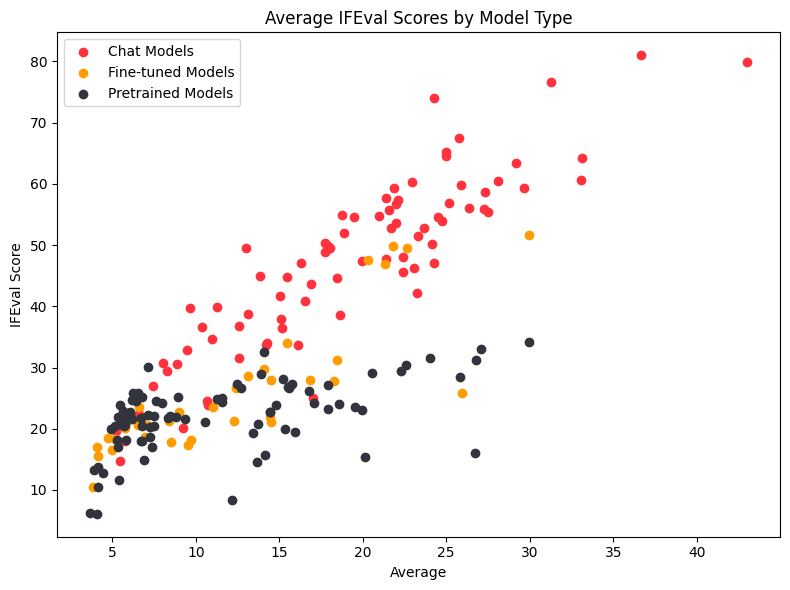

In [65]:
avg = "Average ⬆️"
ifeval = "IFEval"
fig, ax = plt.subplots(figsize=(8, 6))

for i, (group_name, group) in enumerate(ifeval_data.groupby("Type")):
    xval = group[avg]
    yval = group[ifeval]
    ax.scatter(xval, yval, label=model_type_dict[group_name], c=colors[i])

ax.set_title("Average IFEval Scores by Model Type")
ax.set_ylabel("IFEval Score")
ax.set_xlabel("Average")

ax.legend()
plt.tight_layout()
# plt.grid(True)
plt.show()

In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

scatters = []
for i, (group_name, group) in enumerate(ifeval_data.groupby("Type")):
    xval = group[avg]
    scatters.append(
        go.Scatter(
            x=group[avg],
            y=group["MATH Lvl 5"],
            name=model_type_dict[group_name],
            text=group["fullname"],
            hoverinfo="all",
            mode="markers",
        marker=dict(
            color=colors[i],
        ),
        ),
    )

fig = go.Figure(data=scatters)

fig.update_layout(
    title="Average MATH Scores by Model Type",
    yaxis=dict(
        title="MATH lvl 5 Score",
    ),
    xaxis=dict(
        title="Average score over all tasks",
    ),
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
    ),
)
with open("math_vs_avg_all.html", "w") as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs=False))
fig

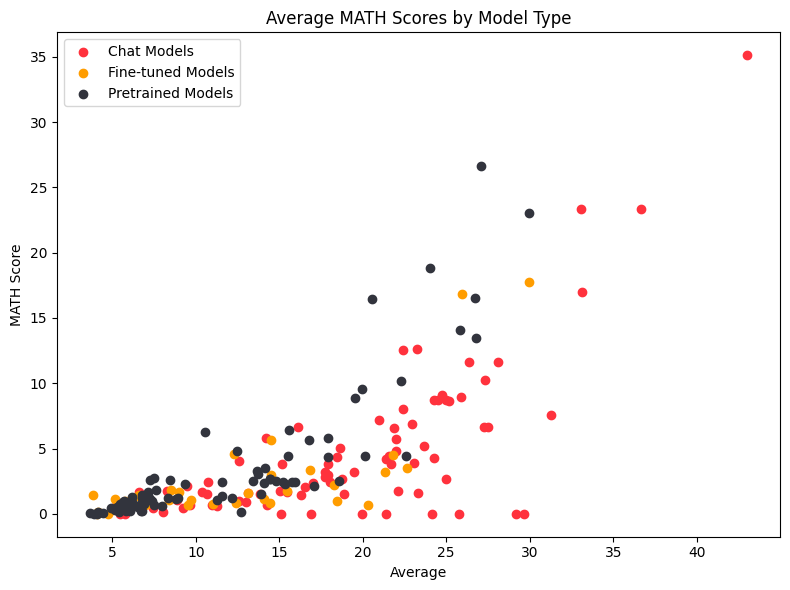

In [67]:
avg = "Average ⬆️"
ifeval = "MATH Lvl 5"
fig, ax = plt.subplots(figsize=(8, 6))

for i, (group_name, group) in enumerate(ifeval_data.groupby("Type")):
    xval = group[avg]
    yval = group[ifeval]
    ax.scatter(xval, yval, label=model_type_dict[group_name], c=colors[i])

ax.set_title("Average MATH Scores by Model Type")
ax.set_ylabel("MATH Score")
ax.set_xlabel("Average")

ax.legend()
plt.tight_layout()
# plt.grid(True)
plt.show()

Clearly 2 clusters: one for pretrained, where performance on IFEval plateaus, whereas performance for chat models is globally correlated with average performance

## MMLU vs MMLU-Pro

In [68]:
data_v1

eval_name Precision  \
0                         0-hero_Matter-0.1-7B_bfloat16  bfloat16   
1             0-hero_Matter-0.1-7B-DPO-preview_bfloat16  bfloat16   
2                   0-hero_Matter-0.1-7B-boost_bfloat16  bfloat16   
3               0-hero_Matter-0.1-7B-boost-DPO_bfloat16  bfloat16   
4       0-hero_Matter-0.1-7B-boost-DPO-preview_bfloat16  bfloat16   
...                                                 ...       ...   
7255      zorobin_mistral-class-shishya-7b-ep3_bfloat16  bfloat16   
7256  zorobin_mistral-class-shishya-all-hal-7b-ep3_b...  bfloat16   
7257  zyh3826_20231206094523-pretrain-Llama-2-13b-hf...  bfloat16   
7258             zyh3826_GML-Mistral-merged-v1_bfloat16  bfloat16   
7259  zyh3826_llama2-13b-ft-openllm-leaderboard-v1_f...   float16   

                                          Type  T Weight type  \
0          💬 chat models (RLHF, DPO, IFT, ...)  💬    Original   
1          💬 chat models (RLHF, DPO, IFT, ...)  💬    Original   
2          💬 chat models (RLHF, DPO, IFT, ...)  💬    Original   
3          💬 chat models (RLHF, DPO, IFT, ...)  💬    Original   
4          💬 chat models (RLHF, DPO, IFT, ...)  💬    Original   
...                                        ... ..         ...   
7255  🔶 fine-tuned on domain-specific datasets  🔶    Original   
7256  🔶 fine-tuned on domain-specific datasets  🔶    Original   
7257  🔶 fine-tuned on domain-specific datasets  🔶    Original   
7258  🔶 fine-tuned on domain-specific datasets  🔶    Original   
7259                                            ?    Original   

            Architecture                                              Model  \
0     MistralForCausalLM  <a target="_blank" href="https://huggingface.c...   
1     MistralForCausalLM  <a target="_blank" href="https://huggingface.c...   
2     MistralForCausalLM  <a target="_blank" href="https://huggingface.c...   
3     MistralForCausalLM  <a target="_blank" href="https://huggingface.c...   
4     MistralForCausalLM  <a target="_blank" href="https://huggingface.c...   
...                  ...                                                ...   
7255  MistralForCausalLM  <a target="_blank" href="https://huggingface.c...   
7256  MistralForCausalLM  <a target="_blank" href="https://huggingface.c...   
7257    LlamaForCausalLM  <a target="_blank" href="https://huggingface.c...   
7258  MistralForCausalLM  <a target="_blank" href="https://huggingface.c...   
7259    LlamaForCausalLM  <a target="_blank" href="https://huggingface.c...   

                                               fullname  \
0                                  0-hero/Matter-0.1-7B   
1                      0-hero/Matter-0.1-7B-DPO-preview   
2                            0-hero/Matter-0.1-7B-boost   
3                        0-hero/Matter-0.1-7B-boost-DPO   
4                0-hero/Matter-0.1-7B-boost-DPO-preview   
...                                                 ...   
7255               zorobin/mistral-class-shishya-7b-ep3   
7256       zorobin/mistral-class-shishya-all-hal-7b-ep3   
7257  zyh3826/20231206094523-pretrain-Llama-2-13b-hf...   
7258                      zyh3826/GML-Mistral-merged-v1   
7259       zyh3826/llama2-13b-ft-openllm-leaderboard-v1   

                                     Model sha  Average ⬆️ Hub License  \
0     035c8193ce71be90be7d90098669afb9164ec6cb   63.391248  apache-2.0   
1     78040e4754051df49dd907cf1fd46a6b8a6cc30f   64.870290  apache-2.0   
2     ba56089eed1211f02e8d0ff47901e77b0cd48f83   63.223517  apache-2.0   
3     5bee9978fcf2188f1070b67f6d94be344fdd99c0   65.985858               
4     d390fb35a781129efd26d53f7ecdb513c0c3da27   65.767435  apache-2.0   
...                                        ...         ...         ...   
7255  e85b73ce67deaa5b40633c5ce2545b23fa3ff3a0   44.276427      llama2   
7256  8f15bc3f0d0235fdb67a8dfb6be36a1ac9c1b8b8   44.802767      llama2   
7257  28b3ae089b5610053f2294d24667fe248405f031   35.580577      llama2   
7258  17a3d5eb5dc23b8a7c29d33cfcd07140

In [69]:
mmlu_pro = "MMLU-PRO"  # Raw'
math = "MATH Lvl 5"  # Raw"
gpqa = "GPQA"
# Extracting the relevant information
v1_data = data_v1[["fullname", "MMLU", "GSM8K"]]
v2_data = data_v2[["fullname", mmlu_pro, math, gpqa]]

# Renaming columns for clarity
# v1_data = v1_data.rename(columns={'MMLU': 'mmlu'})
# v1_data = v1_data.rename(columns={'GSM8K': 'gsm8k'})
# v2_data = v2_data.rename(columns={mmlu_pro: 'mmlu_pro'})
# v2_data = v2_data.rename(columns={math: 'math_lvl5'})
# v2_data = v2_data.rename(columns={math: 'math_lvl5'})

# Merging the two dataframes on 'eval_name'
merged_data = pd.merge(v1_data, v2_data, on="fullname", how="inner")

In [70]:
merged_data.head()

fullname       MMLU      GSM8K   MMLU-PRO  MATH Lvl 5  \
0       01-ai/Yi-1.5-34B  77.995719  73.237301  40.732122   14.048338   
1   01-ai/Yi-1.5-34B-32K  78.153032   0.000000  41.212323   13.444109   
2  01-ai/Yi-1.5-34B-Chat  77.082840  71.645186  39.116061   23.338369   
3        01-ai/Yi-1.5-6B  64.726895  50.341168  23.343307    5.664653   
4        01-ai/Yi-1.5-6B  65.002720  49.810462  23.343307    5.664653   

        GPQA  
0  15.436242  
1  15.100671  
2  15.324385  
3   8.277405  
4   8.277405

In [71]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

scatters = []

for i, (old, new) in enumerate(
    [
        ("MMLU", mmlu_pro),
        ("MMLU", gpqa),
    ]
):  # , ("GSM8K", math)
    xval = group[avg]
    scatters.append(
        go.Scatter(
            x=merged_data[old],
            y=merged_data[new],
            name=f"{new} as function of ({old})",
            text=merged_data["fullname"],
            hoverinfo="all",
            mode="markers",
        marker=dict(
            color=colors[i],
        ),
        ),
    )

fig = go.Figure(data=scatters)

fig.update_layout(
    title="New scores as functions of old evaluations",
    yaxis=dict(
        title="v2 scores",
    ),
    xaxis=dict(
        title="v1 scores",
    ),
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
    ),
)
with open("new_scores_vs_old.html", "w") as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs=False))
fig

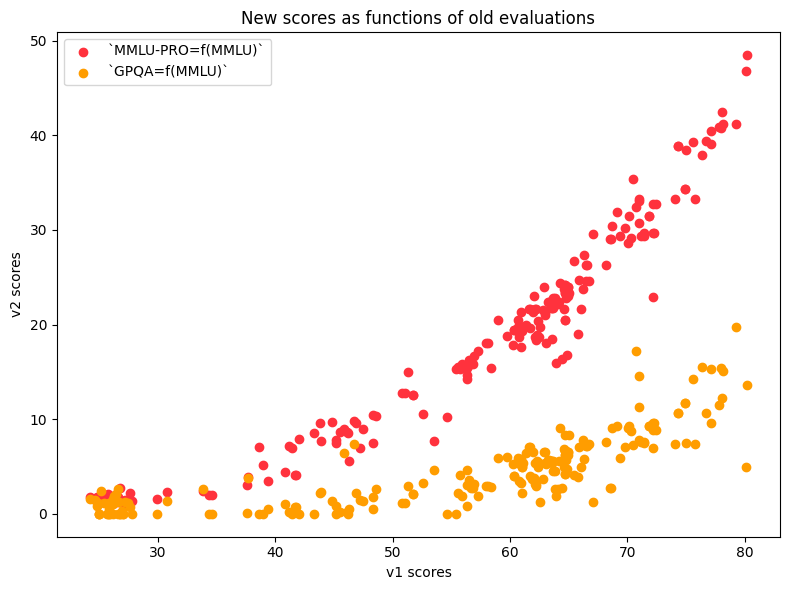

In [72]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, (old, new) in enumerate(
    [("MMLU", mmlu_pro), ("MMLU", gpqa)]
):  # , ("GSM8K", math)
    yval = merged_data[new]
    xval = merged_data[old]
    ax.scatter(xval, yval, c=colors[i], label=f"`{new}=f({old})`")

ax.set_title(f"New scores as functions of old evaluations")
ax.set_ylabel(f"v2 scores")
ax.set_xlabel(f"v1 scores")

plt.tight_layout()
plt.legend()
# plt.grid(True)
plt.show()

In [73]:
merged_data[new]

0      15.436242
1      15.100671
2      15.324385
3       8.277405
4       8.277405
         ...    
208     0.000000
209     0.000000
210     0.000000
211     7.829978
212     4.138702
Name: GPQA, Length: 213, dtype: float64

In [74]:
merged_data[merged_data[new] == 0]


fullname       MMLU      GSM8K  \
27                                EleutherAI/gpt-j-6b  26.783999   2.956785   
30                            EleutherAI/gpt-neox-20b  25.002595   5.458681   
31                              EleutherAI/pythia-12b  26.756067   1.743745   
40                        IDEA-CCNL/Ziya-LLaMA-13B-v1  27.037992   0.000000   
65                           PygmalionAI/pygmalion-6b  25.730836   2.047005   
99                              bigcode/starcoder2-3b  38.648602  19.636088   
103                               bigscience/bloom-3b  26.592509   1.516300   
108                           databricks/dolly-v2-12b  25.916846   1.213040   
116                                 facebook/opt-1.3b  24.963046   0.151630   
125                          google/recurrentgemma-2b  34.611141  16.148597   
126                          google/recurrentgemma-2b  34.382304  15.693707   
135                    meta-llama/Llama-2-13b-chat-hf  54.636271  15.238817   
159                mistralai/Mistral-7B-Instruct-v0.1  55.375474  14.253222   
185                       stabilityai/stablelm-2-1_6b  38.946573  17.437453   
186                  stabilityai/stablelm-2-1_6b-chat  41.472625  38.817286   
187                stabilityai/stablelm-2-zephyr-1_6b  42.034783  35.329795   
188                      stabilityai/stablelm-3b-4e1t  45.225738   3.335861   
189                    stabilityai/stablelm-zephyr-3b  46.167947  42.153146   
197                                  tiiuae/falcon-7b  27.785470   4.624716   
198                         tiiuae/falcon-7b-instruct  25.660047   4.624716   
199                         tiiuae/falcon-7b-instruct  25.836964   4.700531   
201          togethercomputer/GPT-NeoXT-Chat-Base-20B  29.919101   6.899166   
202                   togethercomputer/LLaMA-2-7B-32K  43.325707   4.321456   
208      togethercomputer/RedPajama-INCITE-Base-3B-v1  27.027874   1.288855   
209      togethercomputer/RedPajama-INCITE-Chat-3B-v1  26.231263   0.530705   
210  togethercomputer/RedPajama-INCITE-Instruct-3B-v1  25.032214   1.364670   

      MMLU-PRO  MATH Lvl 5  GPQA  
27    2.676197    1.208459   0.0  
30    1.725030    0.604230   0.0  
31    1.207890    0.906344   0.0  
40    1.124778    0.000000   0.0  
65    2.039007    0.604230   0.0  
99    7.071882    1.435045   0.0  
103   1.475694    0.075529   0.0  
108   1.429521    1.435045   0.0  
116   1.189421    0.755287   0.0  
125   1.992834    1.661631   0.0  
126   1.992834    1.661631   0.0  
135  10.257831    0.604230   0.0  
159  15.336879    1.510574   0.0  
185   5.151079    0.151057   0.0  
186   6.905659    1.057402   0.0  
187   7.930703    2.114804   0.0  
188   7.432033    0.679758   0.0  
189   8.530954    4.078550   0.0  
197   1.392583    0.528701   0.0  
198   1.725030    0.604230   0.0  
199   1.725030    0.604230   0.0  
201   1.614214    1.132931   0.0  
202   8.530954    0.679758   0.0  
208   1.235594    0.906344   0.0  
209   1.411052    0.302115   0.0  
210   1.217125    0.604230   0.0

In [75]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

scatters = []

for (old, new) in [("GSM8K", math)]:
    for i in range(3):
        if i == 0:
            tmp_data = merged_data#[merged_data[new] > 0][merged_data[old] > 0]
            color=colors[1]
        elif i == 1:
            tmp_data = merged_data[merged_data[new] == 0]
            color=colors[0]
        else:
            tmp_data = merged_data[merged_data[old] == 0][merged_data[new] > 0]
            color="green"

        x=tmp_data[old]
        y=tmp_data[new]
        
        scatters.append(
            go.Scatter(
                x=x,
                y=y,
                name=f"{new}=f({old})",
                text=merged_data["fullname"],
                hoverinfo="all",
                mode="markers",
            marker=dict(
                color=color,
            ),
            ),
        )

fig = go.Figure(data=scatters)

fig.update_layout(
    title="MATH (v2) as fn of GSM8K (v1)",
    yaxis=dict(
        title="MATH lvl 5",
    ),
    xaxis=dict(
        title="GSM8K",
    ),
)
fig.update_layout(showlegend=False)

with open("math_vs_gsm8k.html", "w") as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs=False))

fig

/var/folders/cj/cyw80lln0mz_9hlly0x3qvf80000gn/T/ipykernel_19352/3404158306.py:15: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



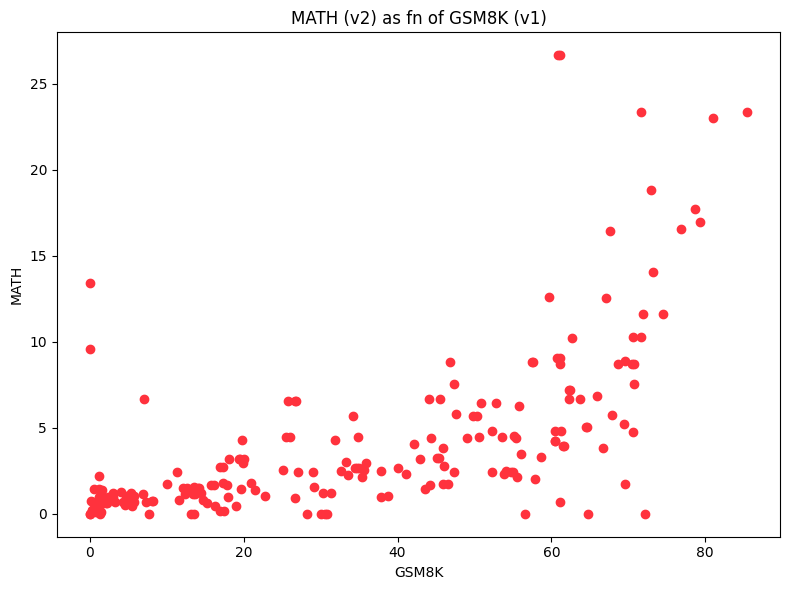

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))

for old, new in [("GSM8K", math)]:
    yval = merged_data[new]
    xval = merged_data[old]
    ax.scatter(xval, yval, c=colors[0], label=f"`{new}=f({old})`")

ax.set_title(f"MATH (v2) as fn of GSM8K (v1)")
ax.set_ylabel(f"MATH")
ax.set_xlabel(f"GSM8K")

plt.tight_layout()
# plt.legend()
# plt.grid(True)
plt.show()

- MMLU and MMLU_Pro are well correlated - overall, a model with High MMLU has a high MMLU Pro score
- For MATH vs GSM8K, we identify 3 groups:
    - "High" MATH score, very low v1 score (2 outliers): possible overfitting on MATH, or , more likely, one of these models with issues with eos tokens on GSM8K
    - Correlation between v2 and v1 score (most models)
    - Low MATH score, high GSM8K score: likely overfitting on GSM8K 

In [77]:
math_data = merged_data[["GSM8K", math, "fullname"]]
print("GSM8K at 0: possible problem with the truncation")
print(math_data[math_data["GSM8K"] == 0])
print("MATH at 0: likely contamination on GSM8K for high scores")
print(math_data[math_data[math] == 0])

GSM8K at 0: possible problem with the truncation
     GSM8K  MATH Lvl 5                     fullname
1      0.0   13.444109         01-ai/Yi-1.5-34B-32K
7      0.0    9.592145          01-ai/Yi-1.5-9B-32K
40     0.0    0.000000  IDEA-CCNL/Ziya-LLaMA-13B-v1
147    0.0    0.000000    microsoft/DialoGPT-medium
MATH at 0: likely contamination on GSM8K for high scores
         GSM8K  MATH Lvl 5                           fullname
24   56.633813         0.0     CohereForAI/c4ai-command-r-v01
40    0.000000         0.0        IDEA-CCNL/Ziya-LLaMA-13B-v1
67    7.657316         0.0             Qwen/Qwen1.5-0.5B-Chat
71   30.098560         0.0             Qwen/Qwen1.5-110B-Chat
73   30.856710         0.0              Qwen/Qwen1.5-14B-Chat
74   30.629265         0.0              Qwen/Qwen1.5-14B-Chat
81   13.570887         0.0               Qwen/Qwen1.5-7B-Chat
82   13.191812         0.0               Qwen/Qwen1.5-7B-Chat
84   28.203184         0.0        Qwen/Qwen1.5-MoE-A2.7B-Chat
91   72.175891

In [78]:
print(math_data[math_data.fullname.str.contains("Qwen")])

        GSM8K  MATH Lvl 5                     fullname
66  16.300227    0.453172            Qwen/Qwen1.5-0.5B
67   7.657316    0.000000       Qwen/Qwen1.5-0.5B-Chat
68  33.586050    2.265861            Qwen/Qwen1.5-1.8B
69  19.029568    0.453172       Qwen/Qwen1.5-1.8B-Chat
70  81.046247   23.036254            Qwen/Qwen1.5-110B
71  30.098560    0.000000       Qwen/Qwen1.5-110B-Chat
72  67.626990   16.465257             Qwen/Qwen1.5-14B
73  30.856710    0.000000        Qwen/Qwen1.5-14B-Chat
74  30.629265    0.000000        Qwen/Qwen1.5-14B-Chat
75  61.106899   26.661631             Qwen/Qwen1.5-32B
76  60.879454   26.661631             Qwen/Qwen1.5-32B
77   7.050796    6.646526        Qwen/Qwen1.5-32B-Chat
78  52.236543    2.416918              Qwen/Qwen1.5-4B
79   2.426080    0.981873         Qwen/Qwen1.5-4B-Chat
80  53.525398    4.456193              Qwen/Qwen1.5-7B
81  13.570887    0.000000         Qwen/Qwen1.5-7B-Chat
82  13.191812    0.000000         Qwen/Qwen1.5-7B-Chat
83  16.982

Edit: all Qwen models with bad scores are chat models!


## MuSR through time

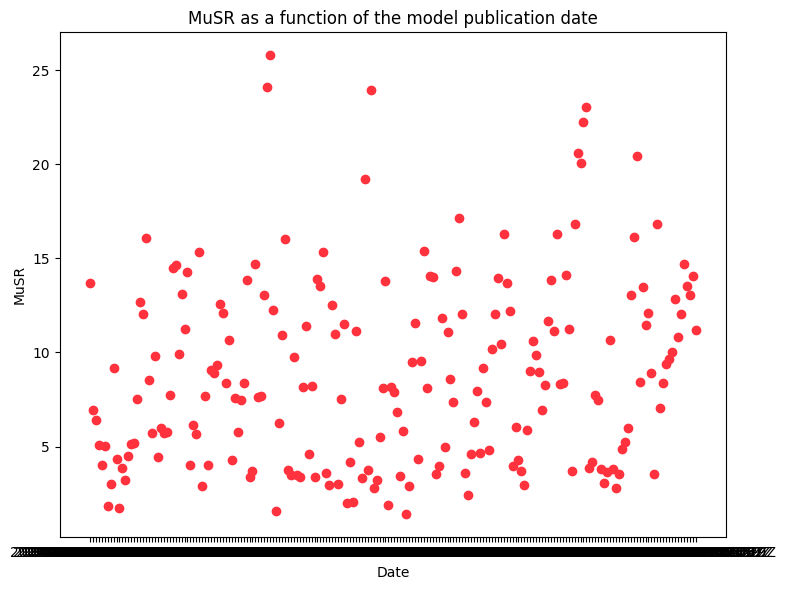

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))

yval = data_v2["MUSR"]
xval = data_v2["date"]
ax.scatter(xval, yval, c=colors[0])

ax.set_title(f"MuSR as a function of the model publication date")
ax.set_ylabel(f"MuSR")
ax.set_xlabel(f"Date")

plt.tight_layout()
# plt.legend()
# plt.grid(True)
plt.show()

# Check Zero Values

In [80]:
# V2 tasks columns
columns_to_check = [
    "IFEval Raw",
    "IFEval",
    "BBH Raw",
    "BBH",
    "MATH Lvl 5 Raw",
    "MATH Lvl 5",
    "GPQA Raw",
    "GPQA",
    "MUSR Raw",
    "MUSR",
    "MMLU-PRO Raw",
    "MMLU-PRO",
]

In [81]:
# Filter the dataframe for rows that have at least one 0 in the specified columns
filtered_v2 = data_v2[data_v2[columns_to_check].isin([0]).any(axis=1)].copy()

# Create the 'missing' column with the list of columns that have a 0 value
filtered_v2["tasks"] = filtered_v2[columns_to_check].apply(
    lambda row: [col for col in columns_to_check if row[col] == 0], axis=1
)

# Select the relevant columns
filtered_v2 = filtered_v2[["eval_name", "fullname", "Precision", "tasks"]]

filtered_v2 = filtered_v2.reset_index().drop(columns=["index"])

In [82]:
filtered_v2.shape

(44, 4)

In [83]:
filtered_v2.head()

eval_name  \
0          upstage_SOLAR-10.7B-Instruct-v1.0_float16   
1  togethercomputer_RedPajama-INCITE-Instruct-3B-...   
2  togethercomputer_RedPajama-INCITE-Chat-3B-v1_f...   
3  togethercomputer_RedPajama-INCITE-Base-3B-v1_f...   
4            togethercomputer_LLaMA-2-7B-32K_float16   

                                           fullname Precision  \
0                 upstage/SOLAR-10.7B-Instruct-v1.0   float16   
1  togethercomputer/RedPajama-INCITE-Instruct-3B-v1   float16   
2      togethercomputer/RedPajama-INCITE-Chat-3B-v1   float16   
3      togethercomputer/RedPajama-INCITE-Base-3B-v1   float16   
4                   togethercomputer/LLaMA-2-7B-32K   float16   

                          tasks  
0  [MATH Lvl 5 Raw, MATH Lvl 5]  
1                        [GPQA]  
2                        [GPQA]  
3                        [GPQA]  
4                        [GPQA]

# Plot Correlations Among Tasks

In [84]:
# Selecting the relevant columns for correlation analysis
correlation_data = data_v2[tasks_v2]
correlation_data_raw = data_v2[tasks_v2_raw]

# Calculating the correlation matrices
# TODO: instead of this one, would be interesting to plot correlation between v2 evals vs v1 evals
correlation_matrix = correlation_data.corr()
correlation_matrix_raw = correlation_data_raw.corr()

In [85]:
correlation_matrix.values

array([[1.        , 0.66176917, 0.43954257, 0.41472524, 0.3818378 ,
        0.61563318],
       [0.66176917, 1.        , 0.68227724, 0.81539197, 0.59311604,
        0.95583109],
       [0.43954257, 0.68227724, 1.        , 0.67577225, 0.33283385,
        0.71284791],
       [0.41472524, 0.81539197, 0.67577225, 1.        , 0.46577638,
        0.85666057],
       [0.3818378 , 0.59311604, 0.33283385, 0.46577638, 1.        ,
        0.53920348],
       [0.61563318, 0.95583109, 0.71284791, 0.85666057, 0.53920348,
        1.        ]])

In [114]:
correlation_matrix = correlation_matrix.sort_index().sort_index(axis=1)

fig = px.imshow(correlation_matrix,
                text_auto=".2f",
                labels=dict(x="Benchmark", y="Benchmark", color="Correlation"),  # Update axis labels to 'Benchmark'
                x=correlation_matrix.columns,
                y=correlation_matrix.index,
                color_continuous_scale='plasma_r',  # Reverse Plasma color scale
                title="Correlation Matrix Heatmap",
                width=600,
                height=500
               )

fig.update(layout_coloraxis_showscale=False)

# Update layout if necessary
fig.update_xaxes(side="bottom", tickangle=-45, tickfont=dict(size=10))  # Rotate and reduce font size on x-axis
fig.update_yaxes(autorange="reversed")  # To reverse the y-axis to match traditional matrix layout

# Save the plot as HTML if needed
with open("correlation_heatmap.html", "w") as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs=False))

fig.show()

In [110]:
# Sort the correlation matrix by index alphabetically
sorted_correlation_matrix = correlation_matrix.sort_index(axis=0).sort_index(axis=1)

fig = go.Figure(
    data=go.Heatmap(
        z=sorted_correlation_matrix,
        x=sorted_correlation_matrix.index,
        y=sorted_correlation_matrix.index,
        text=sorted_correlation_matrix.values,
        texttemplate="%{text:.2}",
        zmin=0,
        zmax=1,
        colorscale='plasma_r'
    ),
)

fig.update_yaxes(autorange="reversed")

fig.update_layout(
    title="Correlation Matrix Heatmap (Normalized Tasks)",
    height=500,
    width=500,
)

fig.update(layout_coloraxis_showscale=False)

with open("correlation_heatmap.html", "w") as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs=False))
fig

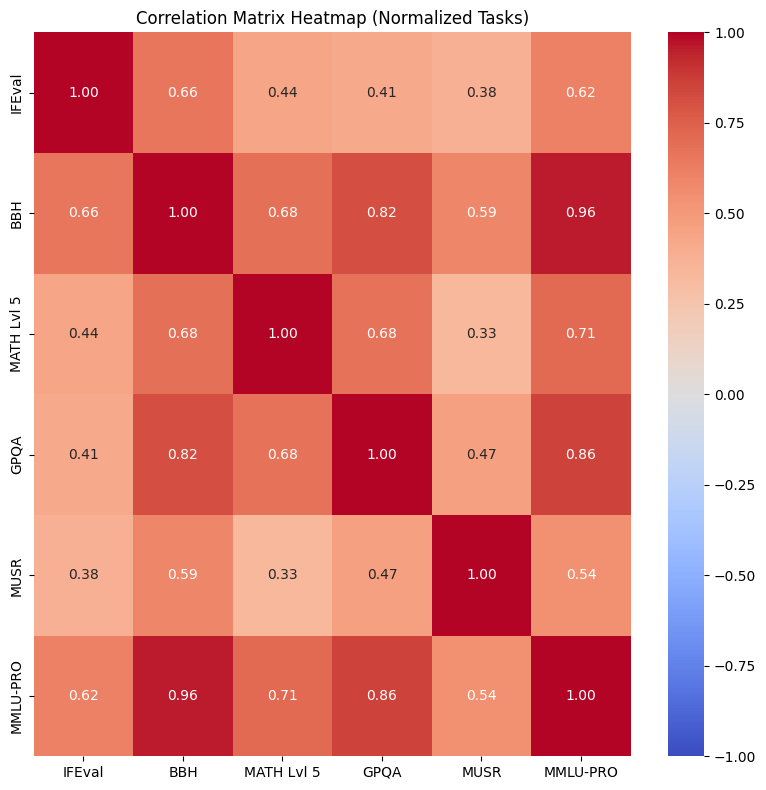

In [87]:
# Plotting the correlation matrices as heatmaps
fig, axes = plt.subplots(figsize=(8, 8))

sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes
)
axes.set_title("Correlation Matrix Heatmap (Normalized Tasks)")

# sns.heatmap(correlation_matrix_raw, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
# axes[1].set_title('Correlation Matrix Heatmap (Raw Tasks)')

plt.tight_layout()
plt.show()

# Ranking Analysis between v1 and v2

In [88]:
# Extracting the relevant information for ranking comparison between v1 and v2
# We actually want to merge with correct precision if possible, else merge on what's available
v2_rank_data = data_v2[["fullname", "Average ⬆️"]]
v1_rank_data = data_v1[["fullname", "Average ⬆️"]]

In [89]:
# Renaming columns for clarity
v2_rank_data = v2_rank_data.rename(columns={"Average ⬆️": "v2_score"})
v1_rank_data = v1_rank_data.rename(columns={"Average ⬆️": "v1_score"})

In [90]:
# Merging the two dataframes on 'eval_name'
merged_rank_data = pd.merge(v1_rank_data, v2_rank_data, on="fullname", how="inner")

In [91]:
merged_rank_data = merged_rank_data.drop_duplicates(subset=["fullname"]).dropna()

In [92]:
merged_rank_data

fullname   v1_score   v2_score
0                                    01-ai/Yi-1.5-34B  73.504618  25.812197
1                                01-ai/Yi-1.5-34B-32K  60.700977  26.787600
2                               01-ai/Yi-1.5-34B-Chat  74.823763  33.076818
3                                     01-ai/Yi-1.5-6B  61.566520  16.778059
5                                01-ai/Yi-1.5-6B-Chat  66.167303  22.405532
..                                                ...        ...        ...
208      togethercomputer/RedPajama-INCITE-Base-3B-v1  38.537852   5.645099
209      togethercomputer/RedPajama-INCITE-Chat-3B-v1  39.527194   4.950649
210  togethercomputer/RedPajama-INCITE-Instruct-3B-v1  39.055049   5.877290
211                 upstage/SOLAR-10.7B-Instruct-v1.0  74.200698  19.961989
212                          upstage/SOLAR-10.7B-v1.0  66.037836  17.072003

[168 rows x 3 columns]

In [93]:
# merged_rank_data[['v1_rank', 'fullname']].sort_values('v1_rank')

In [94]:
# Calculating rank for v1 and v2 based on scores
merged_rank_data["v1_rank"] = merged_rank_data["v1_score"].rank(ascending=False)
merged_rank_data["v2_rank"] = merged_rank_data["v2_score"].rank(ascending=False)

In [95]:
# Calculating rank change and sort
merged_rank_data["rank_change"] = (
    merged_rank_data["v2_rank"] - merged_rank_data["v1_rank"]
)

merged_rank_data = merged_rank_data.sort_values("rank_change")
merged_rank_data = merged_rank_data.dropna()

In [96]:
# Filter to show only top 10 improvements and top 10 declines
show_all = False

if show_all:
    # Show all changes
    top_changes = merged_rank_data

    # Create a column for detailed rank change information
    top_changes["rank_change_info"] = top_changes.apply(
        lambda x: f"{int(x['v1_rank'])} → {int(x['v2_rank'])}", axis=1
    )
else:
    top_changes = pd.concat([merged_rank_data.head(10), merged_rank_data.tail(10)])

    # Create a column for detailed rank change information
    top_changes["rank_change_info"] = top_changes.apply(
        lambda x: f"{int(x['v1_rank'])} → {int(x['v2_rank'])}", axis=1
    )

In [97]:
# Invert the order to show declines first
top_changes_sorted = top_changes.sort_values("rank_change", ascending=True)


In [98]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

colors = [BLACK if x < 0 else RED for x in top_changes_sorted["rank_change"]]

fig = go.Figure(
    data=[
        go.Bar(
            y=top_changes_sorted["fullname"],
            x=top_changes_sorted["rank_change"],
            name="Top and Bottom Changes in Rankings from v1 to v2",
            text=top_changes_sorted["rank_change_info"],
            orientation="h",
            marker_color=colors,
        ),
    ]
)

fig.update_traces(textposition="outside")
fig.update_yaxes(showline=True, linewidth=1, linecolor="black", mirror=False)
fig.update_yaxes(autorange="reversed")

fig.update_layout(
    title="Top and Bottom Changes in Rankings from v1 to v2",
    xaxis_tickfont_size=14,
    yaxis=dict(
        title="model",
    ),
    bargap=0.10,  # gap between bars of adjacent location coordinates.
    xaxis_range=[-85, 70],
    autosize=True,
    height=700,
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
)
with open("rankings_change.html", "w", encoding="utf-8") as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs=False))
fig  # .to_html(full_html=False)

In [99]:
import plotly.express as px

In [100]:

# Using Plotly Express to create a horizontal bar chart
fig = px.bar(
    top_changes_sorted,
    y="fullname",
    x="rank_change",
    text="rank_change_info",
    orientation='h',
    title="Top and Bottom Changes in Rankings from v1 to v2",
    template='plotly',
    color='rank_change',
    color_continuous_scale=[ORANGE, BLACK]
)

# Additional layout settings
fig.update_layout(
    xaxis_tickfont_size=14,
    yaxis=dict(title='Model'),
    xaxis=dict(title='Rank change'),
    bargap=0.1,  # gap between bars of adjacent location coordinates
    xaxis_range=[-85, 85],
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    width=700,
    height=500
)

fig.update_yaxes(autorange="reversed")  # Reverse the y-axis order
fig.update_traces(textposition='outside')  # Set text labels to be outside the bars
fig.update_layout(showlegend=False)
fig.update(layout_coloraxis_showscale=False)

# Save the figure as HTML
fig.write_html("rankings_change.html", full_html=False, include_plotlyjs=False)

# Display the figure
fig.show()



<Figure size 1000x3000 with 0 Axes>

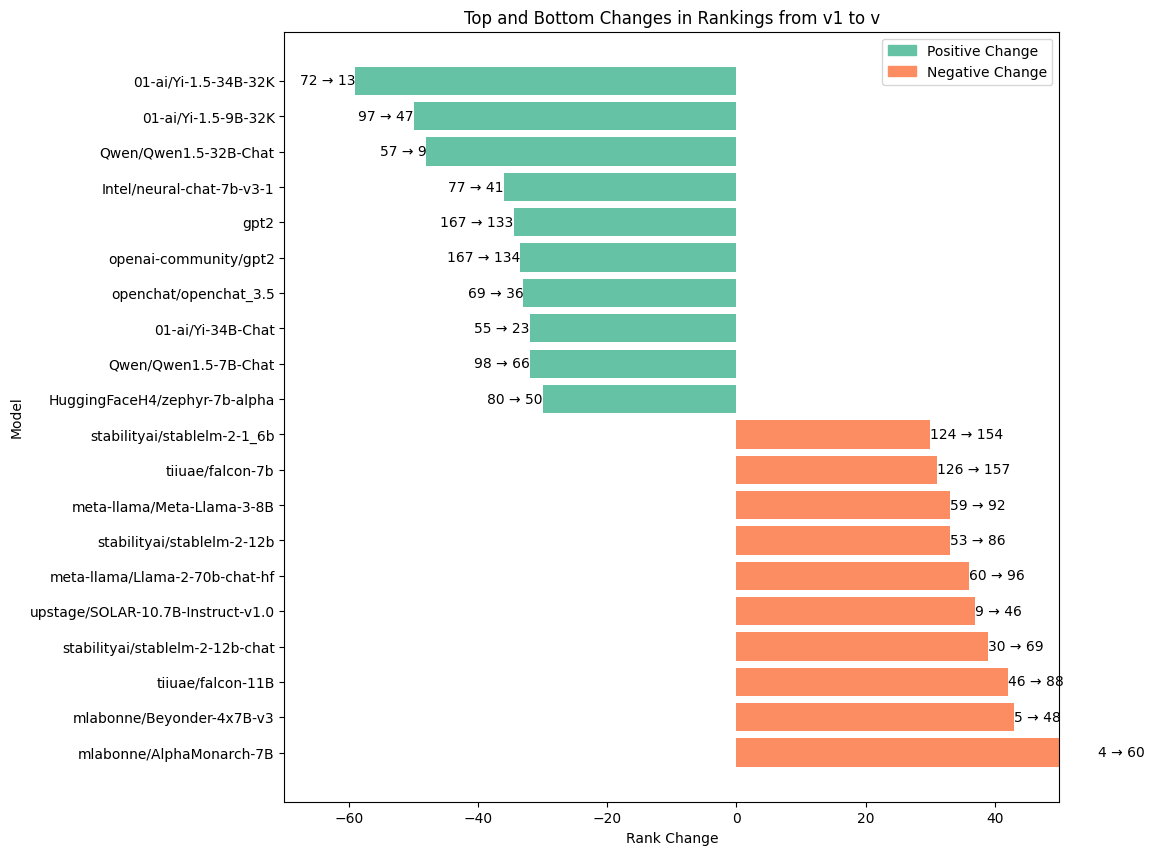

In [101]:
# Invert the order to show declines first
top_changes_sorted = top_changes.sort_values("rank_change", ascending=True)

# Positive changes should be green, and negative changes should be red
colors = ["#66c2a5" if x < 0 else "#fc8d62" for x in top_changes_sorted["rank_change"]]

# Plotting the top and bottom rank changes with corrected colors and adding a legend
plt.figure(figsize=(10, 30))
plt.figure(figsize=(10, 10))
bars = plt.barh(
    top_changes_sorted["fullname"], top_changes_sorted["rank_change"], color=colors
)

# Annotating the bars with rank change details
for bar, rank_change_info in zip(bars, top_changes_sorted["rank_change_info"]):
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        rank_change_info,
        va="center",
        ha="left" if bar.get_width() > 0 else "right",
        fontsize=10,
        color="black",
    )

# Adding a legend
green_patch = mpatches.Patch(color="#66c2a5", label="Positive Change")
red_patch = mpatches.Patch(color="#fc8d62", label="Negative Change")
plt.legend(handles=[green_patch, red_patch])

plt.xlabel("Rank Change")
plt.ylabel("Model")
plt.title("Top and Bottom Changes in Rankings from v1 to v")
plt.xlim(-70, 50)
plt.gca().invert_yaxis()  # Invert y-axis to show declines first
plt.show()

# Outlier Detection

In [102]:
# Calculate the mean score across all tasks for each model
data_v2["mean_score"] = data_v2[tasks_v2].mean(axis=1)
data_v2["mean_score"].head()

0    16.766858
1    19.628255
2     5.663939
3     4.748119
4     5.432974
Name: mean_score, dtype: float64

In [103]:
data_v2["median_score"]

KeyError: 'median_score'

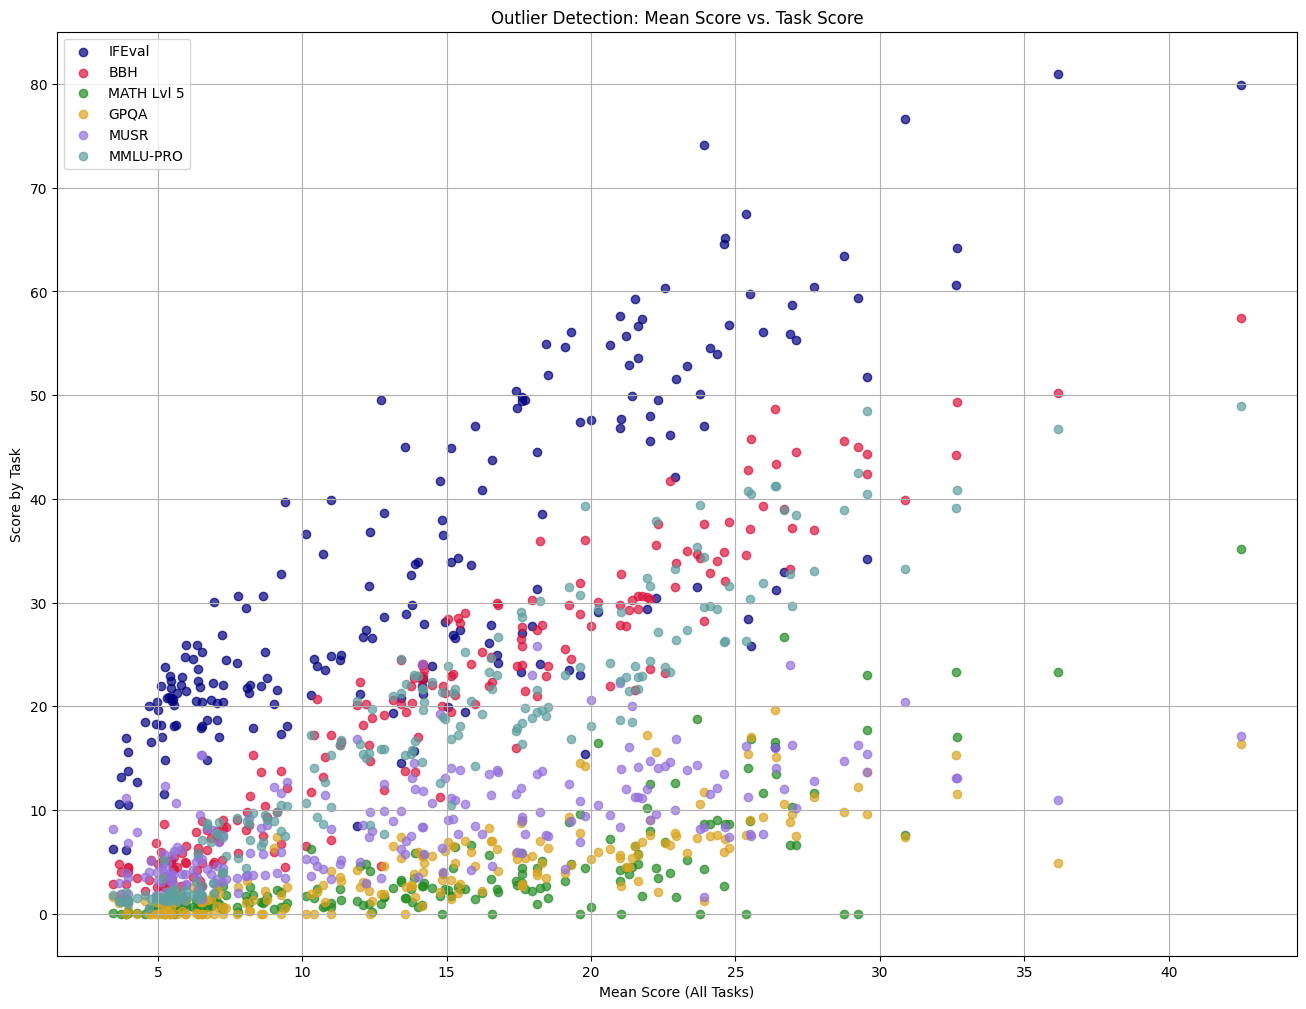

In [ ]:
# Create a large figure to accommodate all plots
plt.figure(figsize=(16, 12))

# Scatter plot for each dataset with a unique color and label
colors = ["#000080", "#DC143C", "#228B22", "#DAA520", "#9370DB", "#5F9EA0", "#FF6347"]
labels = tasks_v2
for task, color, label in zip(tasks_v2, colors, labels):
    plt.scatter(
        data_v2["mean_score"], data_v2[task], alpha=0.7, color=color, label=label
    )

# Label the axes
plt.xlabel("Mean Score (All Tasks)")
plt.ylabel("Score by Task")

# Title of the plot
plt.title("Outlier Detection: Mean Score vs. Task Score")

# Add a grid for better readability
plt.grid(True)

# Add a legend to identify the datasets
plt.legend()

# Show the plot
plt.show()

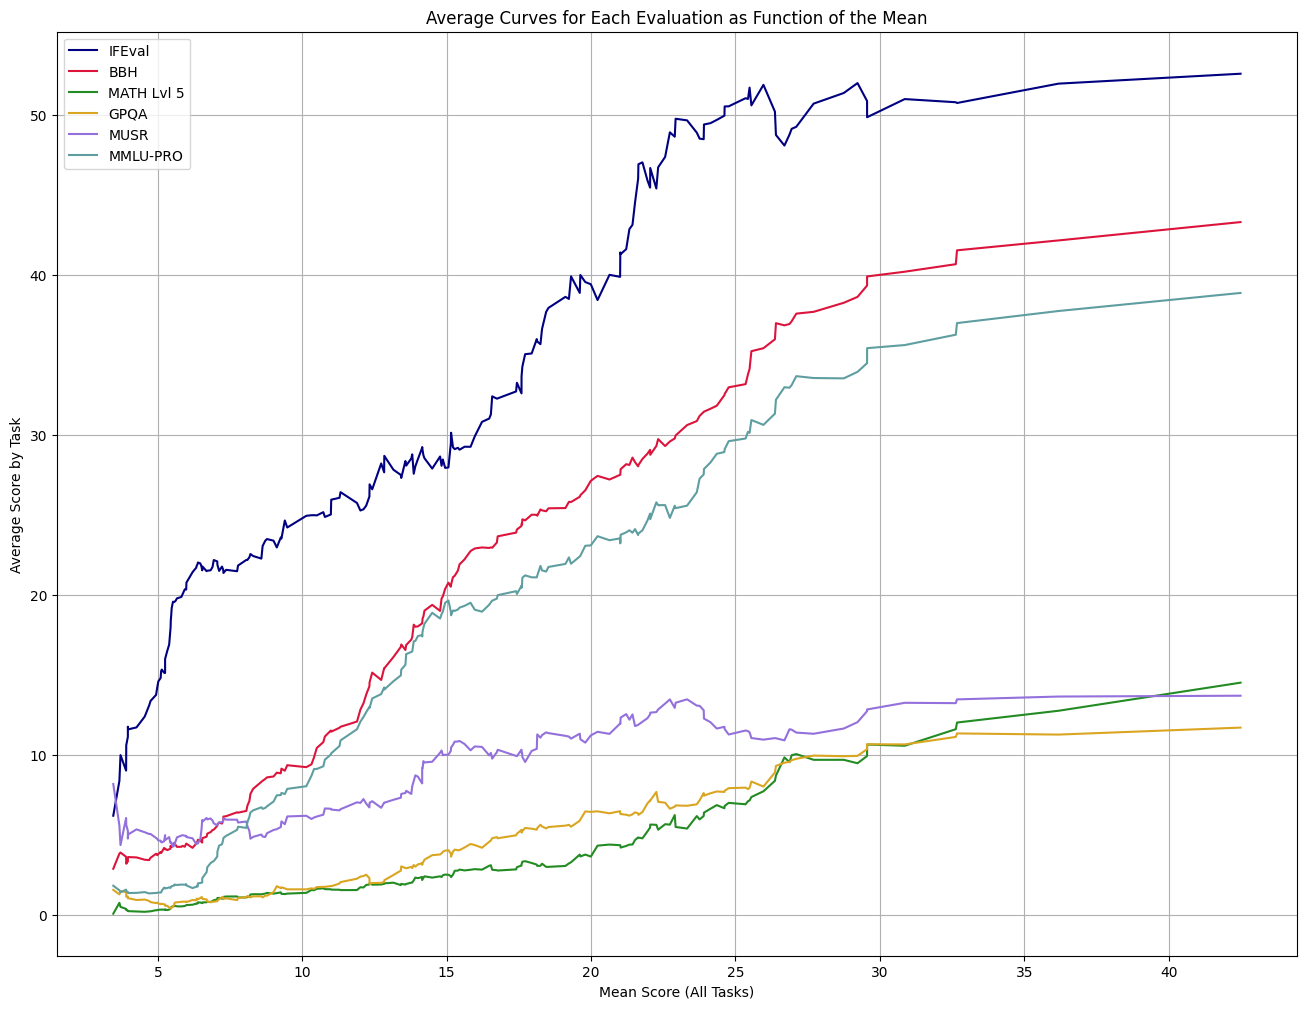

In [ ]:
# Plot average curves for each evaluation as a function of the median
plt.figure(figsize=(16, 12))
for task, color, label in zip(tasks_v2, colors, labels):
    sorted_data = data_v2.sort_values("mean_score")
    plt.plot(
        sorted_data["mean_score"],
        sorted_data[task].rolling(window=20, min_periods=1).mean(),
        color=color,
        label=label,
    )

plt.xlabel("Mean Score (All Tasks)")
plt.ylabel("Average Score by Task")
plt.title("Average Curves for Each Evaluation as Function of the Mean")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
!pip install jinja2


[notice] A new release of pip available: 22.2.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Define a function to highlight the maximum value in each column
def highlight_max(data, color="lightgreen"):
    attr = f"background-color: {color}"
    if data.ndim == 1:
        is_max = data == data.max()
        return [attr if v else "" for v in is_max]
    else:
        is_max = data == data.max().max()
        return pd.DataFrame(
            np.where(is_max, attr, ""), index=data.index, columns=data.columns
        )


# Find the best model for each task based on the maximum score for that task
best_models = data_v2.loc[data_v2[tasks_v2].idxmax()]
best_models_unique = best_models.drop_duplicates(subset=["eval_name"])

styled_best_models = best_models_unique[
    ["eval_name", "mean_score"] + tasks_v2
].style.apply(highlight_max, subset=tasks_v2)

styled_best_models

# Params and Performance

In [ ]:
from datetime import datetime, timezone

threshold_1 = datetime(2023, 10, 1, tzinfo=timezone.utc)
threshold_2 = datetime(2024, 4, 1, tzinfo=timezone.utc)

In [ ]:
full = True

In [ ]:
# Calculate the mean performance score across the tasks for both versions
data_v1["Mean_Score_v1"] = data_v1[tasks_v1].mean(axis=1)
data_v2["Mean_Score_v2"] = data_v2[tasks_v2].mean(axis=1)

# Extract the necessary columns for plotting
if full:
    v1_data = data_v1[["fullname", "#Params (B)", "Mean_Score_v1", "date"]]
    v2_data = data_v2[["fullname", "#Params (B)", "Mean_Score_v2", "date"]]

    # Merge the data on fullname
    merged_data = pd.merge(
        v1_data, v2_data, on=["fullname", "date", "#Params (B)"], how="outer"
    )
else:
    v1_data = data_v1[["fullname", "#Params (B)", "Mean_Score_v1"]]
    v2_data = data_v2[["fullname", "#Params (B)", "Mean_Score_v2", "date"]]

    # Merge the data on fullname
    merged_data = pd.merge(
        v1_data, v2_data, on=["fullname", "#Params (B)"], how="outer"
    )

In [ ]:
merged_data.dropna(subset="date", inplace=True)

merged_data["date"] = pd.to_datetime(merged_data["date"])
for row in merged_data["date"]:
    if isinstance(row, str):
        print(row, type(row))

# dropna
merged_data.dropna(subset=["Mean_Score_v1", "Mean_Score_v2"], inplace=True)

NaT <class 'str'>
NaT <class 'str'>
NaT <class 'str'>
NaT <class 'str'>
NaT <class 'str'>
NaT <class 'str'>


/var/folders/cj/cyw80lln0mz_9hlly0x3qvf80000gn/T/ipykernel_54935/29333465.py:3: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`



In [ ]:
print(len([x for x in merged_data["Mean_Score_v1"] if x > 0]))
print(len([x for x in merged_data["date"] if x != float("nan")]))
print(len(merged_data["#Params (B)"][merged_data["date"] < threshold_1]))
print(
    len(
        merged_data["#Params (B)"][threshold_1 < merged_data["date"]][
            merged_data["date"] < threshold_2
        ]
    )
)
print(len(merged_data["#Params (B)"][merged_data["date"] > threshold_2]))
print(len([x for x in merged_data["Mean_Score_v2"] if x > 0]))

166
166
37
90
39
166


In [ ]:
merged_data["#Params (B)"][merged_data["date"] < threshold_1]

931      6
932      1
934      2
935     20
943     12
945      0
951      0
1264    13
2108     6
2158     7
2170    12
2336     6
3926     1
3927     1
3928     3
3929     0
3930     7
4274    12
4275     3
4276     7
4560     1
4564    30
4805     0
4806     0
5573     7
5574     7
5772    13
5773    13
5774    68
5775    68
5776     6
5778     6
5790     0
5803     1
5851     7
5854     7
5938     7
Name: #Params (B), dtype: int64

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(
    data=[
        go.Scatter(
            x=merged_data["#Params (B)"][merged_data["date"] < threshold_1],
            y=merged_data["Mean_Score_v1"][merged_data["date"] < threshold_1],
            name=f"V1 - before Oct 2023",
            text=merged_data["fullname"][merged_data["date"] < threshold_1],
            mode="markers",
            marker=dict(
                color=RED,
            ),
        ),
        go.Scatter(
            x=merged_data["#Params (B)"][threshold_1 < merged_data["date"]][
                merged_data["date"] < threshold_2
            ],
            y=merged_data["Mean_Score_v1"][threshold_1 < merged_data["date"]][
                merged_data["date"] < threshold_2
            ],
            name="V1 - Oct 2023 to Mar 2024",
            text=merged_data["fullname"][threshold_1 < merged_data["date"]][
                merged_data["date"] < threshold_2
            ],
            mode="markers",
            marker=dict(
                color=ORANGE,
            ),
        ),
        go.Scatter(
            x=merged_data["#Params (B)"][merged_data["date"] > threshold_2],
            y=merged_data["Mean_Score_v1"][merged_data["date"] > threshold_2],
            name="V1 - Mar 2024 and after",
            text=merged_data["fullname"][merged_data["date"] > threshold_2],
            mode="markers",
            marker=dict(
                color=YELLOW,
            ),
        ),
        go.Scatter(
            x=merged_data["#Params (B)"],
            y=merged_data["Mean_Score_v2"],
            name="V2",
            text=merged_data["fullname"],
            mode="markers",
            marker=dict(
                color=BLACK,
            ),
        ),
    ]
)

fig = fig.update_layout(
    title="Size of models vs Performance",
    yaxis=dict(title="Mean Performance Score"),
    xaxis=dict(title="Number of parameters (in B)"),
    legend=dict(
        x=0.75,
        y=1,
        traceorder="normal",
    ),
)
fig
with open("model_size_vs_perf.html", "w") as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs=False))
fig

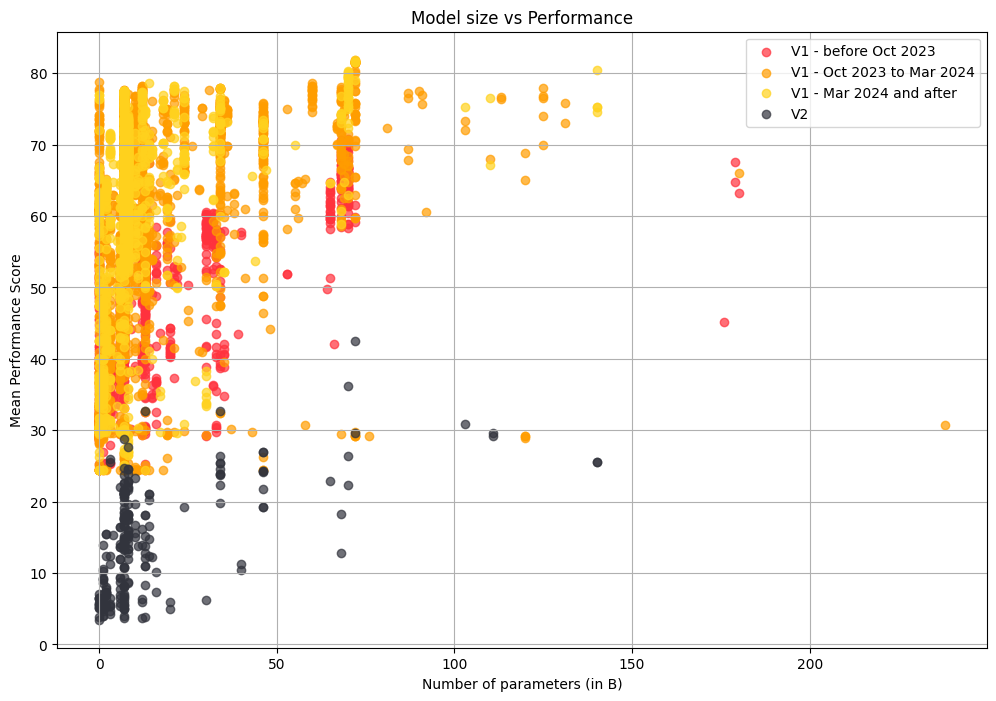

In [ ]:
# Plot the relationship between model complexity and performance for both versions
colors = [
    "#FF323D",
    "#FF9D00",
    "#FFD21E",
    "#32343D",
]
plt.figure(figsize=(12, 8))
plt.scatter(
    merged_data["#Params (B)"][merged_data["date"] < threshold_1],
    merged_data["Mean_Score_v1"][merged_data["date"] < threshold_1],
    label="V1 - before Oct 2023",
    alpha=0.7,
    color=colors[0],
)
plt.scatter(
    merged_data["#Params (B)"][threshold_1 < merged_data["date"]][
        merged_data["date"] < threshold_2
    ],
    merged_data["Mean_Score_v1"][threshold_1 < merged_data["date"]][
        merged_data["date"] < threshold_2
    ],
    label="V1 - Oct 2023 to Mar 2024",
    alpha=0.7,
    color=colors[1],
)
plt.scatter(
    merged_data["#Params (B)"][merged_data["date"] > threshold_2],
    merged_data["Mean_Score_v1"][merged_data["date"] > threshold_2],
    label="V1 - Mar 2024 and after",
    alpha=0.7,
    color=colors[2],
)
# plt.scatter(merged_data['#Params (B)_x'], merged_data['Median_Score_v1'], label='V1', alpha=0.7, color=colors[0])
plt.scatter(
    merged_data["#Params (B)"],
    merged_data["Mean_Score_v2"],
    label="V2",
    alpha=0.7,
    color=colors[3],
)
plt.xlabel("Number of parameters (in B)")
plt.ylabel("Mean Performance Score")
plt.title("Model size vs Performance")
plt.legend()
plt.grid(True)
plt.show()

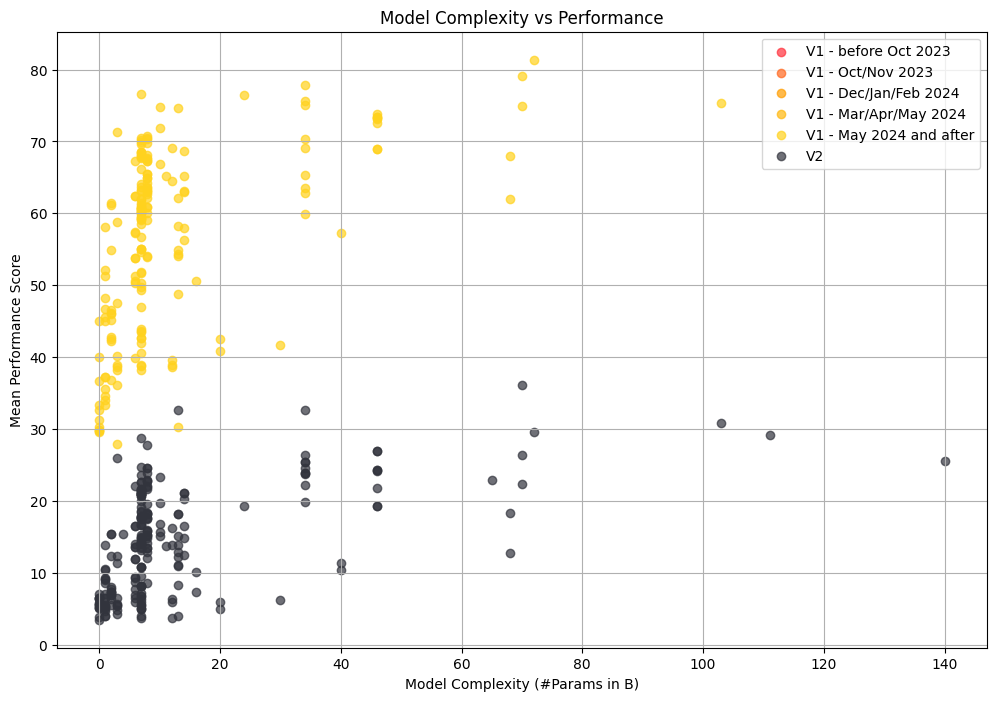

In [ ]:
from datetime import datetime, timezone

threshold_1 = datetime(2023, 10, 1, tzinfo=timezone.utc)
threshold_2 = datetime(2023, 12, 1, tzinfo=timezone.utc)
threshold_3 = datetime(2024, 2, 1, tzinfo=timezone.utc)
threshold_4 = datetime(2024, 5, 1, tzinfo=timezone.utc)

# Plot the relationship between model complexity and performance for both versions
colors = [
    "#FF323D",
    "#FF681F",
    "#FF9D00",
    "#FFB80F",
    "#FFD21E",
    "#32343D",
]
plt.figure(figsize=(12, 8))
plt.scatter(
    merged_data["#Params (B)"][merged_data["date"] < threshold_1],
    merged_data["Mean_Score_v1"][merged_data["date"] < threshold_1],
    label="V1 - before Oct 2023",
    alpha=0.7,
    color=colors[0],
)
plt.scatter(
    merged_data["#Params (B)"][threshold_1 < merged_data["date"]][
        merged_data["date"] < threshold_2
    ],
    merged_data["Mean_Score_v1"][threshold_1 < merged_data["date"]][
        merged_data["date"] < threshold_2
    ],
    label="V1 - Oct/Nov 2023",
    alpha=0.7,
    color=colors[1],
)
plt.scatter(
    merged_data["#Params (B)"][threshold_2 < merged_data["date"]][
        merged_data["date"] < threshold_3
    ],
    merged_data["Mean_Score_v1"][threshold_2 < merged_data["date"]][
        merged_data["date"] < threshold_3
    ],
    label="V1 - Dec/Jan/Feb 2024",
    alpha=0.7,
    color=colors[2],
)
plt.scatter(
    merged_data["#Params (B)"][threshold_3 < merged_data["date"]][
        merged_data["date"] < threshold_4
    ],
    merged_data["Mean_Score_v1"][threshold_3 < merged_data["date"]][
        merged_data["date"] < threshold_4
    ],
    label="V1 - Mar/Apr/May 2024",
    alpha=0.7,
    color=colors[3],
)
plt.scatter(
    merged_data["#Params (B)"][merged_data["date"] > threshold_4],
    merged_data["Mean_Score_v1"][merged_data["date"] > threshold_4],
    label="V1 - May 2024 and after",
    alpha=0.7,
    color=colors[4],
)
# plt.scatter(merged_data['#Params (B)_x'], merged_data['Median_Score_v1'], label='V1', alpha=0.7, color=colors[0])
plt.scatter(
    merged_data["#Params (B)"],
    merged_data["Mean_Score_v2"],
    label="V2",
    alpha=0.7,
    color=colors[-1],
)
plt.xlabel("Model Complexity (#Params in B)")
plt.ylabel("Mean Performance Score")
plt.title("Model Complexity vs Performance")
plt.legend()
plt.grid(True)
plt.show()

## Outliers analysis

In [ ]:
# Identify models with 0 parameters but high median scores
zero_params_high_score_v1 = v1_data[
    (v1_data["#Params (B)"] == 0)
    & (v1_data["Median_Score_v1"] > v1_data["Median_Score_v1"].median())
]
zero_params_high_score_v2 = v2_data[
    (v2_data["#Params (B)"] == 0)
    & (v2_data["Median_Score_v2"] > v2_data["Median_Score_v2"].median())
]

zero_params_high_score_v1

KeyError: 'Median_Score_v1'

In [ ]:
# Dropping duplicated rows based on eval_name
data_v1 = data_v1.drop_duplicates(subset="eval_name")
data_v2 = data_v2.drop_duplicates(subset="eval_name")

# Identify models with 0 parameters but high median scores and include task scores
zero_params_high_score_v1 = data_v1[
    (data_v1["#Params (B)"] == 0)
    & (data_v1["Median_Score_v1"] > data_v1["Median_Score_v1"].median())
]
zero_params_high_score_v2 = data_v2[
    (data_v2["#Params (B)"] == 0)
    & (data_v2["Median_Score_v2"] > data_v2["Median_Score_v2"].median())
]

KeyError: 'Median_Score_v1'

In [ ]:
def highlight_max(data, color="lightgreen"):
    attr = f"background-color: {color}"
    if data.ndim == 1:
        is_max = data == data.max()
        return [attr if v else "" for v in is_max]
    else:
        is_max = data == data.max().max()
        return pd.DataFrame(
            np.where(is_max, attr, ""), index=data.index, columns=data.columns
        )


# Create a mask to filter rows with at least one max value in tasks
mask_v1 = (
    zero_params_high_score_v1[tasks_v1]
    == zero_params_high_score_v1[tasks_v1].max(axis=0)
).any(axis=1)
mask_v2 = (
    zero_params_high_score_v2[tasks_v2]
    == zero_params_high_score_v2[tasks_v2].max(axis=0)
).any(axis=1)

# Filter dataframes based on the mask
filtered_v1 = zero_params_high_score_v1[mask_v1]
filtered_v2 = zero_params_high_score_v2[mask_v2]

filtered_v1 = filtered_v1[
    [
        "eval_name",
        "fullname",
        "Precision",
        "#Params (B)",
        "ARC",
        "HellaSwag",
        "MMLU",
        "TruthfulQA",
        "Winogrande",
        "GSM8K",
        "Median_Score_v1",
    ]
]
filtered_v2 = filtered_v2[
    [
        "eval_name",
        "fullname",
        "Precision",
        "#Params (B)",
        "IFEval",
        "ARC Challenge",
        "BBH",
        "MATH Lvl 5",
        "GPQA",
        "MUSR",
        "MMLU-PRO",
        "Median_Score_v2",
    ]
]

# Highlighting the highest scores per task in each row
highlighted_v1 = filtered_v1.style.apply(highlight_max, subset=tasks_v1)
highlighted_v2 = filtered_v2.style.apply(highlight_max, subset=tasks_v2)

NameError: name 'zero_params_high_score_v1' is not defined

In [ ]:
highlighted_v1

NameError: name 'highlighted_v1' is not defined

In [ ]:
highlighted_v2

NameError: name 'highlighted_v2' is not defined